In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [15]:
# Load the dataset
file_path = 'POP_49824rows_DEC2015_sp_yt_usdemogr.csv'
data = pd.read_csv(file_path)

# extract date features
def extract_date_features(df):
    df['Event Date'] = pd.to_datetime(df['Event Date'])
    df['Year'] = df['Event Date'].dt.year
    df['Month'] = df['Event Date'].dt.month
    df['Day of Week'] = df['Event Date'].dt.dayofweek
    return df

data = extract_date_features(data)
data = data[(data['Headliner'].str.contains('"', na=False))]
# target var and features
target = 'Avg. Gross USD'
features = ['Number of Shows', 'Avg. Event Capacity', 'Ticket Price Min USD', 'Ticket Price Max USD', 
             'Market', 'Genre', 'City', 'State', 'Venue', 'Headliner', 'Support', 
            'Promoter', 'sp followers', 'yt Subscriber Count', 'Year', 'Month', 'Day of Week']

cols_to_convert = [
    'Avg. Gross USD', 'Avg. Tickets Sold', 'Avg. Event Capacity', 
    'Ticket Price Min USD', 'Ticket Price Max USD', 'Ticket Price Avg. USD'
]
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col].str.replace('[^0-9.]', '', regex=True), errors='coerce')



/tmp/ipykernel_335209/1885239915.py:3: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Text(0, 0.5, 'Frequency')

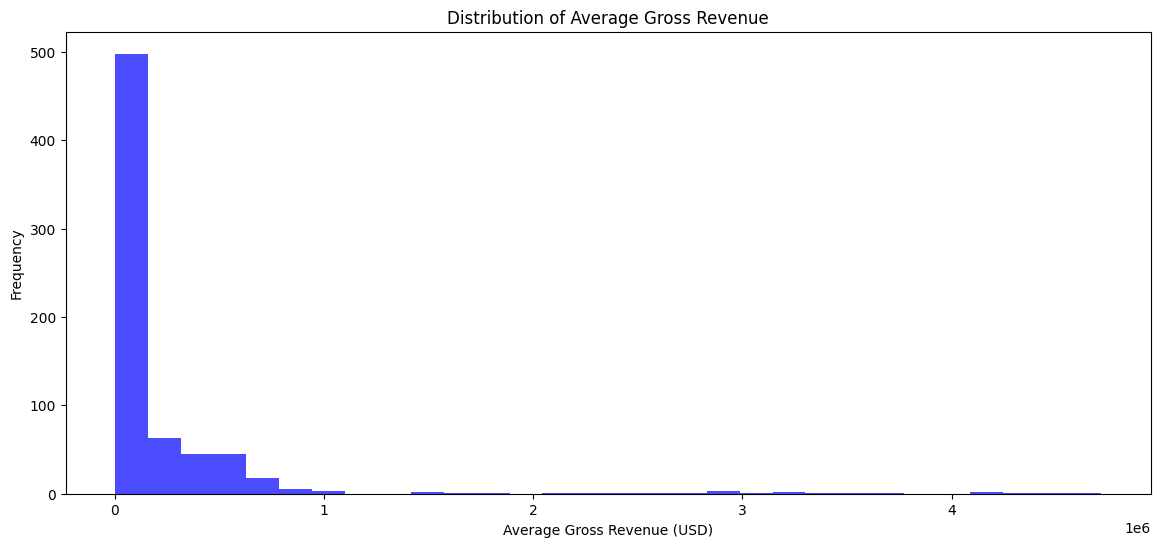

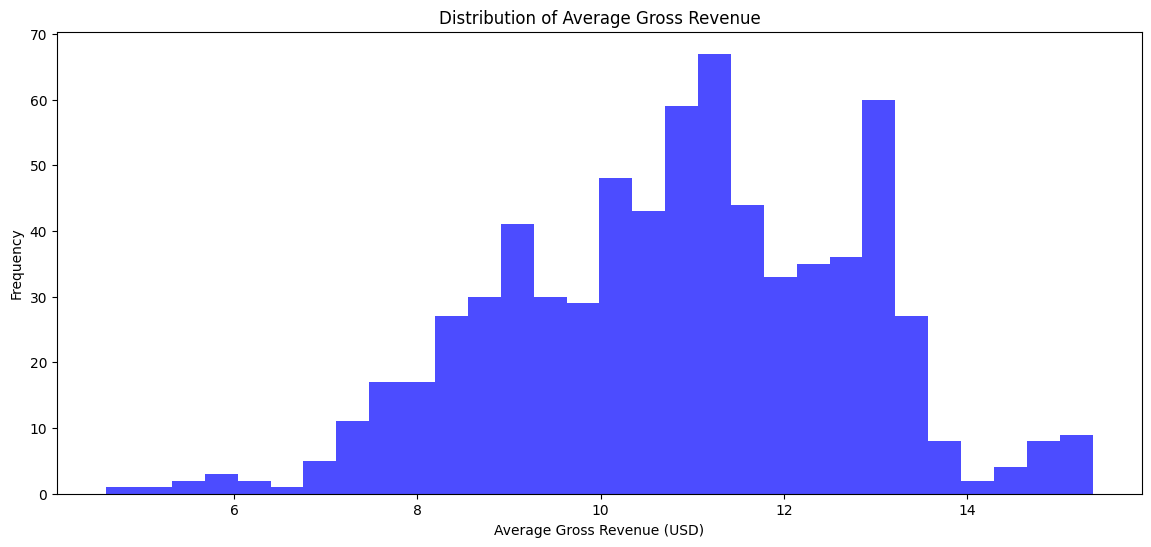

In [16]:
# Histograms for average gross revenue and log
plt.figure(figsize=(14, 6))

plt.hist(data['Avg. Gross USD'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Average Gross Revenue')
plt.xlabel('Average Gross Revenue (USD)')
plt.ylabel('Frequency')

plt.figure(figsize=(14, 6))

plt.hist(np.log(data['Avg. Gross USD'].dropna()), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Average Gross Revenue')
plt.xlabel('Average Gross Revenue (USD)')
plt.ylabel('Frequency')


In [17]:
# preprocessors
numerical_features = ['Number of Shows', 'Avg. Event Capacity', 'Ticket Price Min USD', 'Ticket Price Max USD', 
                      'sp followers', 'yt Subscriber Count', 'Year', 'Month', 'Day of Week']
categorical_features = ['Market', 'Genre', 'City', 'State', 'Venue', 'Headliner', 'Support', 'Promoter']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Models

In [18]:
# Linear Regression 
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())]) 

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Root Mean Squared Error:", mse)

R-squared: 0.07442378290506102
Root Mean Squared Error: 606922.9115559115


In [19]:
# Linear Regression on Log transformed target variable
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())]) 

X_train, X_test, y_train, y_test = train_test_split(data[features], np.log(data[target]+1), test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_original = np.exp(y_pred)-1
y_test_original = np.exp(y_test)-1
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Root Mean Squared Error:", mse)

R-squared: -3.6831113473210744
Root Mean Squared Error: 77753688.96834643


In [20]:
# Random Forest on Log transformed target variable

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200)) 
])


X_train, X_test, y_train, y_test = train_test_split(data[features], np.log(data[target]+1), test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_original = np.exp(y_pred)-1
y_test_original = np.exp(y_test)-1
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Root Mean Squared Error:", mse)

R-squared: 0.9350314612063274
Root Mean Squared Error: 284956.62359221897


In [21]:
# Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200)) 
])
from sklearn.model_selection import train_test_split
import math

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Root Mean Squared Error:", mse)

R-squared: 0.9121010416493953
Root Mean Squared Error: 187033.45798221836


In [22]:
# Lasso Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha = 0.001)) 
])


X_train, X_test, y_train, y_test = train_test_split(data[features], np.log(data[target]+1), test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_original = np.exp(y_pred)-1
y_test_original = np.exp(y_test)-1
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Root Mean Squared Error:", mse)

R-squared: 0.84386960507433
Root Mean Squared Error: 257002.12397230114


In [23]:
# XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',XGBRegressor(
    n_estimators=123,
    max_depth = 6,
    min_child_weight=6.775491524356438,
    learning_rate=0.2045492385700394,
    subsample=0.9538853360715174,
    colsample_bylevel=0.9843540929830947,
    colsample_bytree=0.7927149465668909,
    reg_alpha=0.05758042236618048,
    reg_lambda=5.778258009012479,
    objective='reg:squarederror',
    enable_categorical=True
)
) 
])


X_train, X_test, y_train, y_test = train_test_split(data[features], np.log(data[target]+1), test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_original = np.exp(y_pred)-1
y_test_original = np.exp(y_test)-1
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Root Mean Squared Error:", mse)

R-squared: 0.9336571551728841
Root Mean Squared Error: 205000.98291427837


In [26]:
# Still working on
# Pipeline for grid search among models and features
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())]) 

model_params = [
    {'model': [LinearRegression()]},
    {'model': [Lasso()], 'model__alpha': [0.001, 0.01, 0.1, 1]},
    {'model': [RandomForestRegressor()], 'model__n_estimators': [50, 100, 200]},
    {'model': [XGBRegressor(objective='reg:squarederror')], 'model__max_depth': [3, 5], 'model__n_estimators': [50, 100]}
]

scoring = {
    'RMSE': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False), greater_is_better=False),
    'R2': 'r2',
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False)
}

grid_search = GridSearchCV(pipeline, model_params, cv=5, scoring=scoring, refit='RMSE', verbose=3, return_train_score=False)

grid_search.fit(data[features], data[target])

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation RMSE score: ", -grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END model=LinearRegression(); MAE: (test=-326547.269) R2: (test=-2.207) RMSE: (test=-468060.144) total time=   0.1s
[CV 2/5] END model=LinearRegression(); MAE: (test=-601829.118) R2: (test=-0.410) RMSE: (test=-1325240.125) total time=   0.0s
[CV 3/5] END model=LinearRegression(); MAE: (test=-278613.267) R2: (test=-2.011) RMSE: (test=-396725.839) total time=   0.0s
[CV 4/5] END model=LinearRegression(); MAE: (test=-155273.427) R2: (test=-0.177) RMSE: (test=-202458.393) total time=   0.0s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and wi

[CV 5/5] END model=LinearRegression(); MAE: (test=-183694.214) R2: (test=-0.288) RMSE: (test=-364625.993) total time=   0.1s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 1/5] END model=Lasso(), model__alpha=0.001; MAE: (test=-407772.886) R2: (test=-14.897) RMSE: (test=-1042178.065) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8068435835.593684, tolerance: 3719340339.732299
  model = cd_fast.sparse_enet_coordinate_descent(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 2/5] END model=Lasso(), model__alpha=0.001; MAE: (test=-549766.293) R2: (test=-0.227) RMSE: (test=-1236463.151) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28641886505.764168, tolerance: 22301338791.479206
  model = cd_fast.sparse_enet_coordinate_descent(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=Lasso(), model__alpha=0.001; MAE: (test=-166446.484) R2: (test=-0.364) RMSE: (test=-267008.272) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=Lasso(), model__alpha=0.001; MAE: (test=-165299.646) R2: (test=-1.489) RMSE: (test=-294434.585) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 5/5] END model=Lasso(), model__alpha=0.001; MAE: (test=-193800.955) R2: (test=0.154) RMSE: (test=-295564.167) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 1/5] END model=Lasso(), model__alpha=0.01; MAE: (test=-406215.008) R2: (test=-14.692) RMSE: (test=-1035436.722) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8536490593.269041, tolerance: 3719340339.732299
  model = cd_fast.sparse_enet_coordinate_descent(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 2/5] END model=Lasso(), model__alpha=0.01; MAE: (test=-549030.131) R2: (test=-0.229) RMSE: (test=-1237127.398) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29197422744.201256, tolerance: 22301338791.479206
  model = cd_fast.sparse_enet_coordinate_descent(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=Lasso(), model__alpha=0.01; MAE: (test=-165358.998) R2: (test=-0.352) RMSE: (test=-265862.524) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=Lasso(), model__alpha=0.01; MAE: (test=-165183.608) R2: (test=-1.484) RMSE: (test=-294129.999) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 5/5] END model=Lasso(), model__alpha=0.01; MAE: (test=-193141.924) R2: (test=0.161) RMSE: (test=-294276.254) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23276669766.950325, tolerance: 21763936583.74531
  model = cd_fast.sparse_enet_coordinate_descent(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 1/5] END model=Lasso(), model__alpha=0.1; MAE: (test=-377758.002) R2: (test=-11.824) RMSE: (test=-936042.913) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12743337536.183128, tolerance: 3719340339.732299
  model = cd_fast.sparse_enet_coordinate_descent(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 2/5] END model=Lasso(), model__alpha=0.1; MAE: (test=-539796.984) R2: (test=-0.230) RMSE: (test=-1237683.202) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34228838276.699604, tolerance: 22301338791.479206
  model = cd_fast.sparse_enet_coordinate_descent(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=Lasso(), model__alpha=0.1; MAE: (test=-157932.465) R2: (test=-0.244) RMSE: (test=-254969.877) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=Lasso(), model__alpha=0.1; MAE: (test=-158243.013) R2: (test=-1.293) RMSE: (test=-282582.305) total time=   0.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 5/5] END model=Lasso(), model__alpha=0.1; MAE: (test=-184012.278) R2: (test=0.235) RMSE: (test=-281015.884) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61862449845.88218, tolerance: 21763936583.74531
  model = cd_fast.sparse_enet_coordinate_descent(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 1/5] END model=Lasso(), model__alpha=1; MAE: (test=-110165.128) R2: (test=0.508) RMSE: (test=-183343.497) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34835402248.05649, tolerance: 3719340339.732299
  model = cd_fast.sparse_enet_coordinate_descent(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 2/5] END model=Lasso(), model__alpha=1; MAE: (test=-479451.676) R2: (test=-0.138) RMSE: (test=-1190329.372) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65174018012.017006, tolerance: 22301338791.479206
  model = cd_fast.sparse_enet_coordinate_descent(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=Lasso(), model__alpha=1; MAE: (test=-104581.105) R2: (test=0.379) RMSE: (test=-180155.420) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51578310330.121864, tolerance: 22379625452.89633
  model = cd_fast.sparse_enet_coordinate_descent(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=Lasso(), model__alpha=1; MAE: (test=-103032.685) R2: (test=-0.191) RMSE: (test=-203643.593) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40289282963.67082, tolerance: 21502913393.384556
  model = cd_fast.sparse_enet_coordinate_descent(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 5/5] END model=Lasso(), model__alpha=1; MAE: (test=-128681.287) R2: (test=0.638) RMSE: (test=-193462.999) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 1/5] END model=RandomForestRegressor(), model__n_estimators=50; MAE: (test=-38591.585) R2: (test=0.769) RMSE: (test=-125604.258) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 2/5] END model=RandomForestRegressor(), model__n_estimators=50; MAE: (test=-406515.642) R2: (test=0.081) RMSE: (test=-1070155.505) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=RandomForestRegressor(), model__n_estimators=50; MAE: (test=-65767.120) R2: (test=0.753) RMSE: (test=-113521.971) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=RandomForestRegressor(), model__n_estimators=50; MAE: (test=-56531.022) R2: (test=0.751) RMSE: (test=-93126.976) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 5/5] END model=RandomForestRegressor(), model__n_estimators=50; MAE: (test=-68787.847) R2: (test=0.742) RMSE: (test=-163287.006) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 1/5] END model=RandomForestRegressor(), model__n_estimators=100; MAE: (test=-39629.015) R2: (test=0.800) RMSE: (test=-116826.539) total time=   0.8s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 2/5] END model=RandomForestRegressor(), model__n_estimators=100; MAE: (test=-395083.779) R2: (test=0.129) RMSE: (test=-1041294.937) total time=   0.8s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=RandomForestRegressor(), model__n_estimators=100; MAE: (test=-70496.650) R2: (test=0.712) RMSE: (test=-122741.621) total time=   0.8s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=RandomForestRegressor(), model__n_estimators=100; MAE: (test=-59358.365) R2: (test=0.727) RMSE: (test=-97558.510) total time=   0.8s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 5/5] END model=RandomForestRegressor(), model__n_estimators=100; MAE: (test=-65246.337) R2: (test=0.753) RMSE: (test=-159750.798) total time=   0.8s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 1/5] END model=RandomForestRegressor(), model__n_estimators=200; MAE: (test=-39265.230) R2: (test=0.798) RMSE: (test=-117591.058) total time=   1.6s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 2/5] END model=RandomForestRegressor(), model__n_estimators=200; MAE: (test=-398859.823) R2: (test=0.114) RMSE: (test=-1050216.989) total time=   1.6s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=RandomForestRegressor(), model__n_estimators=200; MAE: (test=-68267.119) R2: (test=0.741) RMSE: (test=-116437.656) total time=   1.6s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=RandomForestRegressor(), model__n_estimators=200; MAE: (test=-62949.936) R2: (test=0.672) RMSE: (test=-106881.245) total time=   1.6s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and wi

[CV 5/5] END model=RandomForestRegressor(), model__n_estimators=200; MAE: (test=-67193.691) R2: (test=0.739) RMSE: (test=-164066.984) total time=   1.6s
[CV 1/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=3, model__n_estimators=50; MAE: (test=-48730.575) R2: (test=0.7

/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and wi

[CV 4/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=3, model__n_estimators=50; MAE: (test=-72736.801) R2: (test=0.567) RMSE: (test=-122785.982) total time=   0.1s
[CV 5/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_byl

/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and wi

[CV 3/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=3, model__n_estimators=100; MAE: (test=-73553.279) R2: (test=0.687) RMSE: (test=-127977.071) total time=   0.1s
[CV 4/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_by

/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 2/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=5, model__n_estimators=50; MAE: (test=-398682.877) R2: (test=0.139) RMSE: (test=-1035560.562) total time=   0.0s
[CV 3/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_b

/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=5, model__n_estimators=50; MAE: (test=-63231.281) R2: (test=0.638) RMSE: (test=-112282.729) total time=   0.0s
[CV 5/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_byl

/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 1/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=5, model__n_estimators=100; MAE: (test=-48136.668) R2: (test=0.801) RMSE: (test=-116476.712) total time=  12.7s
[CV 2/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_by

/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=5, model__n_estimators=100; MAE: (test=-76849.464) R2: (test=0.666) RMSE: (test=-132197.533) total time=   0.2s
[CV 4/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_by

In [27]:

results = grid_search.cv_results_
for mean_rmse, mean_r2, mean_mae, params in zip(results['mean_test_RMSE'], results['mean_test_R2'], results['mean_test_MAE'], results['params']):
    print(f"Params: {params} - RMSE: {-mean_rmse}, R^2: {mean_r2}, MAE: {-mean_mae}")

Params: {'model': LinearRegression()} - RMSE: 551422.0987651126, R^2: -1.018412573437311, MAE: 309191.45893762796
Params: {'model': Lasso(), 'model__alpha': 0.001} - RMSE: 627129.6482134886, R^2: -3.3646716822056826, MAE: 296617.25284840923
Params: {'model': Lasso(), 'model__alpha': 0.01} - RMSE: 625366.5793875073, R^2: -3.319099798152826, MAE: 295785.9339638703
Params: {'model': Lasso(), 'model__alpha': 0.1} - RMSE: 598458.8361750271, R^2: -2.670993011820722, MAE: 283548.54818885395
Params: {'model': Lasso(), 'model__alpha': 1} - RMSE: 390186.9762610976, R^2: 0.23927556779972128, MAE: 185182.3762517033
Params: {'model': RandomForestRegressor(), 'model__n_estimators': 50} - RMSE: 313139.14325792243, R^2: 0.6191675207703413, MAE: 127238.64316421429
Params: {'model': RandomForestRegressor(), 'model__n_estimators': 100} - RMSE: 307634.4811431468, R^2: 0.6242079424246793, MAE: 125962.82942819389
Params: {'model': RandomForestRegressor(), 'model__n_estimators': 200} - RMSE: 311038.786444357

In [28]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())]) 

model_params = [
    {'model': [LinearRegression()]},
    {'model': [Lasso()], 'model__alpha': [0.001, 0.01, 0.1, 1]},
    {'model': [RandomForestRegressor()], 'model__n_estimators': [50, 100, 200]},
    {'model': [XGBRegressor(objective='reg:squarederror')], 'model__max_depth': [3, 5], 'model__n_estimators': [50, 100]}
]

scoring = {
    'RMSE': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False), greater_is_better=False),
    'R2': 'r2',
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False)
}

grid_search = GridSearchCV(pipeline, model_params, cv=5, scoring=scoring, refit='RMSE', verbose=3, return_train_score=False)

grid_search.fit(data[features], np.log(data[target]+1))

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation RMSE score: ", -grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END model=LinearRegression(); MAE: (test=-1.584) R2: (test=-0.605) RMSE: (test=-2.297) total time=   0.1s
[CV 2/5] END model=LinearRegression(); MAE: (test=-2.284) R2: (test=-1.142) RMSE: (test=-3.369) total time=   0.0s
[CV 3/5] END model=LinearRegression(); MAE: (test=-1.714) R2: (test=-0.773) RMSE: (test=-2.299) total time=   0.0s
[CV 4/5] END model=LinearRegression(); MAE: (test=-0.733) R2: (test=0.590) RMSE: (test=-0.959) total time=   0.0s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and wi

[CV 5/5] END model=LinearRegression(); MAE: (test=-2.662) R2: (test=-5.272) RMSE: (test=-4.326) total time=   0.0s
[CV 1/5] END model=Lasso(), model__alpha=0.001; MAE: (test=-1.441) R2: (test=-1.864) RMSE: (test=-3.068) total time=   0.1s
[CV 2/5] END model=Lasso(), model__alpha=0.001; MAE: (test=-0.669) R2: (test=0.846) RMSE: (test=-0.904) total time=   0.0s
[CV 3/5] END model=Lasso(), model__alpha=0.001; MAE: (test=-0.624) R2: (test=0.762) RMSE: (test=-0.843) total time=   0.1s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and wi

[CV 4/5] END model=Lasso(), model__alpha=0.001; MAE: (test=-0.552) R2: (test=0.755) RMSE: (test=-0.741) total time=   0.0s
[CV 5/5] END model=Lasso(), model__alpha=0.001; MAE: (test=-0.669) R2: (test=0.619) RMSE: (test=-1.066) total time=   0.1s
[CV 1/5] END model=Lasso(), model__alpha=0.01; MAE: (test=-0.936) R2: (test=0.562) RMSE: (test=-1.199) total time=   0.0s
[CV 2/5] END model=Lasso(), model__alpha=0.01; MAE: (test=-0.708) R2: (test=0.812) RMSE: (test=-0.998) total time=   0.0s
[CV 3/5] END model=Lasso(), model__alpha=0.01; MAE: (test=-0.764) R2: (test=0.500) RMSE: (test=-1.221) total time=   0.0s
[CV 4/5] END model=Lasso(), model__alpha=0.01; MAE: (test=-0.612) R2: (test=0.735) RMSE: (test=-0.771) total time=   0.0s
[CV 5/5] END model=Lasso(), model__alpha=0.01; MAE: (test=-0.726) R2: (test=0.572) RMSE: (test=-1.130) total time=   0.0s
[CV 1/5] END model=Lasso(), model__alpha=0.1; MAE: (test=-1.030) R2: (test=0.489) RMSE: (test=-1.296) total time=   0.0s
[CV 2/5] END model=Lass

/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and wi

[CV 4/5] END model=Lasso(), model__alpha=0.1; MAE: (test=-0.619) R2: (test=0.722) RMSE: (test=-0.789) total time=   0.0s
[CV 5/5] END model=Lasso(), model__alpha=0.1; MAE: (test=-0.796) R2: (test=0.527) RMSE: (test=-1.188) total time=   0.0s
[CV 1/5] END model=Lasso(), model__alpha=1; MAE: (test=-1.628) R2: (test=-0.213) RMSE: (test=-1.997) total time=   0.0s
[CV 2/5] END model=Lasso(), model__alpha=1; MAE: (test=-1.752) R2: (test=0.128) RMSE: (test=-2.149) total time=   0.0s
[CV 3/5] END model=Lasso(), model__alpha=1; MAE: (test=-1.413) R2: (test=0.120) RMSE: (test=-1.620) total time=   0.0s
[CV 4/5] END model=Lasso(), model__alpha=1; MAE: (test=-1.026) R2: (test=0.233) RMSE: (test=-1.311) total time=   0.0s
[CV 5/5] END model=Lasso(), model__alpha=1; MAE: (test=-1.150) R2: (test=0.239) RMSE: (test=-1.507) total time=   0.0s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and wi

[CV 1/5] END model=RandomForestRegressor(), model__n_estimators=50; MAE: (test=-0.542) R2: (test=0.838) RMSE: (test=-0.730) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 2/5] END model=RandomForestRegressor(), model__n_estimators=50; MAE: (test=-0.650) R2: (test=0.844) RMSE: (test=-0.908) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=RandomForestRegressor(), model__n_estimators=50; MAE: (test=-0.394) R2: (test=0.920) RMSE: (test=-0.490) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=RandomForestRegressor(), model__n_estimators=50; MAE: (test=-0.438) R2: (test=0.881) RMSE: (test=-0.516) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 5/5] END model=RandomForestRegressor(), model__n_estimators=50; MAE: (test=-0.448) R2: (test=0.861) RMSE: (test=-0.645) total time=   0.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 1/5] END model=RandomForestRegressor(), model__n_estimators=100; MAE: (test=-0.523) R2: (test=0.851) RMSE: (test=-0.699) total time=   0.8s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 2/5] END model=RandomForestRegressor(), model__n_estimators=100; MAE: (test=-0.659) R2: (test=0.842) RMSE: (test=-0.914) total time=   0.8s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=RandomForestRegressor(), model__n_estimators=100; MAE: (test=-0.388) R2: (test=0.921) RMSE: (test=-0.485) total time=   0.8s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=RandomForestRegressor(), model__n_estimators=100; MAE: (test=-0.445) R2: (test=0.878) RMSE: (test=-0.522) total time=   0.8s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 5/5] END model=RandomForestRegressor(), model__n_estimators=100; MAE: (test=-0.445) R2: (test=0.859) RMSE: (test=-0.649) total time=   0.7s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 1/5] END model=RandomForestRegressor(), model__n_estimators=200; MAE: (test=-0.529) R2: (test=0.847) RMSE: (test=-0.709) total time=   1.6s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 2/5] END model=RandomForestRegressor(), model__n_estimators=200; MAE: (test=-0.652) R2: (test=0.843) RMSE: (test=-0.911) total time=   1.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=RandomForestRegressor(), model__n_estimators=200; MAE: (test=-0.385) R2: (test=0.923) RMSE: (test=-0.479) total time=   1.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=RandomForestRegressor(), model__n_estimators=200; MAE: (test=-0.440) R2: (test=0.882) RMSE: (test=-0.515) total time=   1.5s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 5/5] END model=RandomForestRegressor(), model__n_estimators=200; MAE: (test=-0.452) R2: (test=0.859) RMSE: (test=-0.648) total time=   1.5s
[CV 1/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=3, model__n_estimators=50; MAE: (test=-0.558) R2: (test=0.833) RMSE: (te

/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=3, model__n_estimators=50; MAE: (test=-0.403) R2: (test=0.919) RMSE: (test=-0.493) total time=   0.1s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=3, model__n_estimators=50; MAE: (test=-0.497) R2: (test=0.843) RMSE: (test=-0.593) total time=   0.2s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 5/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=3, model__n_estimators=50; MAE: (test=-0.462) R2: (test=0.844) RMSE: (test=-0.682) total time=   0.2s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 1/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=3, model__n_estimators=100; MAE: (test=-0.574) R2: (test=0.820) RMSE: (test=-0.768) total time=  22.9s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 2/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=3, model__n_estimators=100; MAE: (test=-0.631) R2: (test=0.871) RMSE: (test=-0.827) total time=  21.9s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=3, model__n_estimators=100; MAE: (test=-0.381) R2: (test=0.926) RMSE: (test=-0.471) total time=  20.4s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=3, model__n_estimators=100; MAE: (test=-0.476) R2: (test=0.854) RMSE: (test=-0.573) total time=  21.8s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 5/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=3, model__n_estimators=100; MAE: (test=-0.470) R2: (test=0.840) RMSE: (test=-0.691) total time=   1.4s
[CV 1/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=Non

/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 3/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=5, model__n_estimators=50; MAE: (test=-0.414) R2: (test=0.909) RMSE: (test=-0.520) total time=   0.1s


/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=5, model__n_estimators=50; MAE: (test=-0.441) R2: (test=0.867) RMSE: (test=-0.547) total time=   0.2s
[CV 5/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None

/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 2/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=5, model__n_estimators=100; MAE: (test=-0.639) R2: (test=0.853) RMSE: (test=-0.882) total time=   0.2s
[CV 3/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=Non

/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/root/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV 4/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), model__max_depth=5, model__n_estimators=100; MAE: (test=-0.435) R2: (test=0.868) RMSE: (test=-0.544) total time=   0.1s
[CV 5/5] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=Non

In [29]:

results = grid_search.cv_results_
for mean_rmse, mean_r2, mean_mae, params in zip(results['mean_test_RMSE'], results['mean_test_R2'], results['mean_test_MAE'], results['params']):
    print(f"Params: {params} - RMSE: {-mean_rmse}, R^2: {mean_r2}, MAE: {-mean_mae}")

Params: {'model': LinearRegression()} - RMSE: 2.650012209653778, R^2: -1.4405812914172305, MAE: 1.7954862659018356
Params: {'model': Lasso(), 'model__alpha': 0.001} - RMSE: 1.3243597551799229, R^2: 0.22355499645909713, MAE: 0.7911330452999354
Params: {'model': Lasso(), 'model__alpha': 0.01} - RMSE: 1.0639817556605826, R^2: 0.6362187919776259, MAE: 0.7490162412123113
Params: {'model': Lasso(), 'model__alpha': 0.1} - RMSE: 1.0600678464377105, R^2: 0.6438674595749038, MAE: 0.8057019054957492
Params: {'model': Lasso(), 'model__alpha': 1} - RMSE: 1.7167637694409978, R^2: 0.10144568514575888, MAE: 1.3936861561532996
Params: {'model': RandomForestRegressor(), 'model__n_estimators': 50} - RMSE: 0.657566312221515, R^2: 0.8687877371499345, MAE: 0.4945027081809018
Params: {'model': RandomForestRegressor(), 'model__n_estimators': 100} - RMSE: 0.6540309038619668, R^2: 0.8703061934533839, MAE: 0.49189417485736564
Params: {'model': RandomForestRegressor(), 'model__n_estimators': 200} - RMSE: 0.652411